In [21]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [22]:
import matplotlib.pyplot as plt

In [23]:
img_rows, img_cols = 28, 28         # 사이즈

In [24]:
# 데이터셋 분리
(x_train, y_train), (x_test, y_test) = mnist.load_data()    # x는 실제 이미지 저장, y는 이미지에 대한 숫자

In [25]:
print(K.image_data_format())

channels_last


In [26]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)    # 개수, 행, 열, 채널(1: 흑백)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)    #  행, 열, 채널(1: 흑백)

In [27]:
# type 변경 - 부동소수점을 표현하기 위해
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [28]:
# 정규화
x_train/=255
x_test/=255

print('x_train shape:',x_train.shape)
print(x_train.shape[0], 'trainsamples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 trainsamples
10000 test samples


전체 60000개, 28by28, 흑백

In [29]:
import tensorflow as tf

In [30]:
# 범주화(one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)    # 10개 구간으로 나눔
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [31]:
# 모델링(modeling) - 출력층: 0-9
# sequential()을 쓰면 model.add()해서 층을 쌓으면 됨
# functional()을 쓰면 x=2, f(x) = x + 2(=4), g(x) = 3f(x)(=12)와 같이 x가 계속 업데이트 되는 형태

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))    # 노드 수, 3*3짜리 필터, 활성화함수: 렐루, 첫 입력층input_shape

In [32]:
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))    # 2*2로 맥스풀링(가로 세로 절반으로 축소, 특징값만 추출)

In [33]:
model.add(Dropout(0.25))    # 다음 컨볼루션 가기 전에 드롭아웃
model.add(Flatten())        # 3차원 >> 1차원(전처리 끝남)
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# 출력층(0 ~ 9)
model.add(Dense(10, activation='softmax'))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [35]:
# 환경설정(model 학습)
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = 'adam',
              metrics = ['accuracy'])

In [36]:
# 학습
history = model.fit(x_train, y_train,
                    batch_size = 128,    # 128개의 학습 데이터를 처리할 때마다 내부 계수를 업데이트
                    epochs = 12,
                    verbose = 1,
                    validation_data = (x_test, y_test))

Epoch 1/12
469/469 [==============================] - 5s 10ms/step - loss: 0.4931 - accuracy: 0.8426 - val_loss: 0.0528 - val_accuracy: 0.9834
Epoch 2/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0888 - accuracy: 0.9737 - val_loss: 0.0375 - val_accuracy: 0.9879
Epoch 3/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0661 - accuracy: 0.9800 - val_loss: 0.0312 - val_accuracy: 0.9906
Epoch 4/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0533 - accuracy: 0.9831 - val_loss: 0.0328 - val_accuracy: 0.9897
Epoch 5/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0436 - accuracy: 0.9865 - val_loss: 0.0292 - val_accuracy: 0.9899
Epoch 6/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0390 - accuracy: 0.9881 - val_loss: 0.0281 - val_accuracy: 0.9909
Epoch 7/12
469/469 [==============================] - 4s 9ms/step - loss: 0.0316 - accuracy: 0.9906 - val_loss: 0.0258 - val_accuracy: 0.9920
Epoch

In [37]:
score = model.evaluate(x_test, y_test, verbose=0)    # 평가는 테스트 데이터로

In [38]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02829728089272976
Test accuracy: 0.9927999973297119


In [39]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


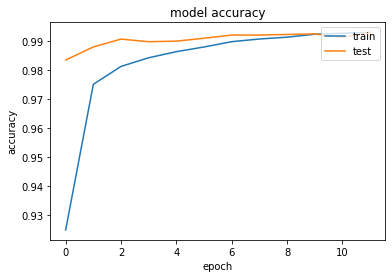

In [40]:
plt.plot(history.history['accuracy'])      # 정확도 그래프 그리기
plt.plot(history.history['val_accuracy'])  # 테스트 데이터 정확도 그래프 그리기
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

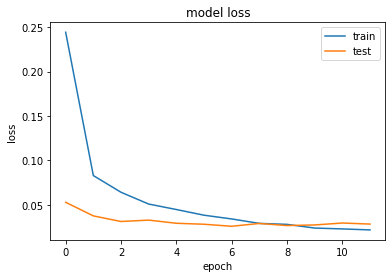

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [42]:
model.save('mnist_cnn.h5')
print('saved')

saved
